### Problem statement: 
### To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Data Reading - Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,BatchNormalization

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Create a dataset

Define some parameters for the loader:

In [2]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

Use 80% of the images for training, and 20% for validation.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [3]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\\Users\Shiva Shankar\\ML-2\\melanoma\\Train',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 2239 files belonging to 9 classes.


In [4]:
len(train_ds)

70

The totle files is 2239 and btach_size is 32 

totole_batch = (2239/32) ~ 70

its mean 70 iteration 

In [5]:
# train dataset class names 
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [6]:
# test_data 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\\Users\Shiva Shankar\\ML-2\\melanoma\\Test',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size = (180,180,3)
    batch_size = batch_size             # 32
)

Found 118 files belonging to 9 classes.


The totle files is 118 and btach_size is 32

totole_batch = (118/32) ~ 4

its mean 4 iteration

In [7]:
len(val_ds)

4

#### train_ds have total 2239
#### test_ds have total 118 files 
#### total =2357 files ,train and test have 9 classes 

In [8]:
# test dataset class names 
val_ds.class_names


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [9]:
# the datatype is tensor form because multidimension data 
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# fetch 1 batch (1 batch have 32 files)  
for image_batch , lable_batch in val_ds.take(1) :
    print('this is one batch shape :',image_batch.shape)  # (batch_size,img_height,img_width,chanells)  
    print('this is lable shape :',lable_batch.shape)


this is one batch shape : (32, 180, 180, 3)
this is lable shape : (32,)


In [11]:
# convert the label to numeric 
for image_batch , label_batch in train_ds.take(1):
    print(image_batch.numpy())
    print('\n')
    print('convert the label to numeric : ',label_batch.numpy())

[[[[145.70833  119.54167  122.      ]
   [153.625    122.875    126.625   ]
   [149.5      119.958336 117.208336]
   ...
   [157.50006  136.       150.95834 ]
   [150.       126.75     144.625   ]
   [145.70842  125.083374 138.1251  ]]

  [[146.70833  126.70833  124.20833 ]
   [151.125    126.125    126.125   ]
   [153.       122.33333  124.16667 ]
   ...
   [153.4584   128.7084   144.29178 ]
   [149.75     122.75     140.      ]
   [145.7917   119.583374 131.66672 ]]

  [[152.79167  128.20833  124.75    ]
   [158.75     128.5      125.25    ]
   [153.16667  123.333336 123.41667 ]
   ...
   [146.49988  117.12497  135.49988 ]
   [146.625    116.5      131.      ]
   [143.83334  114.333405 125.41669 ]]

  ...

  [[120.833336  94.791664  98.708336]
   [121.75      97.5      102.125   ]
   [123.33333   96.91667   96.625   ]
   ...
   [118.87497   88.20834   90.29172 ]
   [116.5       87.625     87.375   ]
   [118.        87.58334   88.0417  ]]

  [[121.083336  90.16667   88.458336]
   [124

In [12]:
# store all the classes of skin cancer in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These class_names corresponding to the directory names are in alphabetical order.
class_names = train_ds.class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

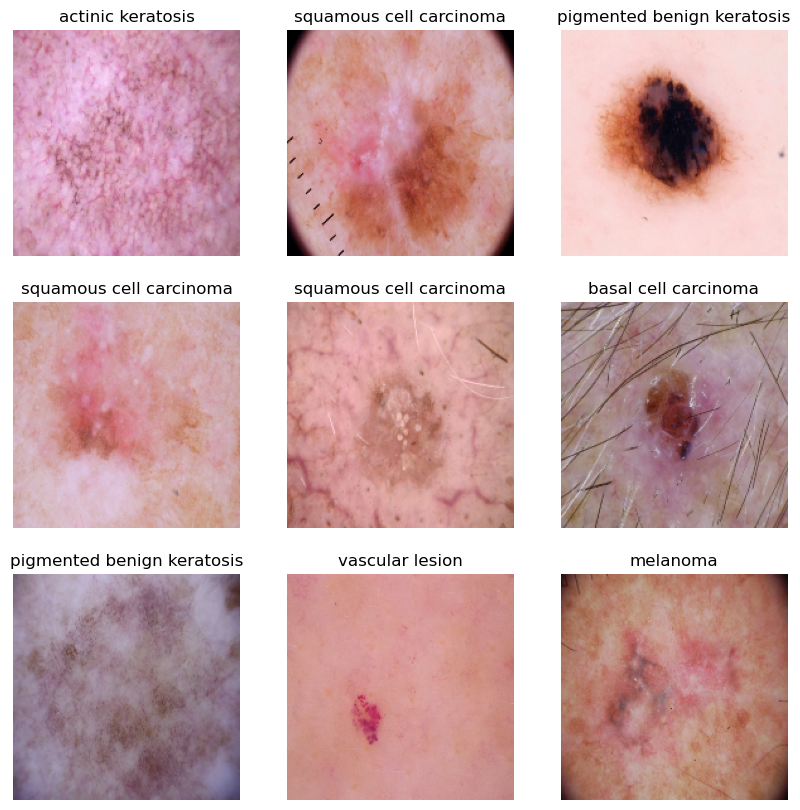

In [13]:
plt.figure(figsize=(10, 10))
for image_batch , labels_batch in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
# increase the perfomance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


In [15]:
# resize and rescale the value 
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
# data augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the '[0, 1]'

In [17]:
input_shape = (batch_size , img_height , img_width , channels)

In [18]:
# create CNN model

model = Sequential()


model.add(resize_and_rescale)

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.10))

model.add(Dense(n_classes))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [19]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.build(input_shape)

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 180, 180, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 180, 180, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 180, 180, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (32, 180, 180, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (32, 90, 90, 64)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (32, 90, 90, 64)          36928     
                                                      

### Train the model

In [22]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


70/70 [==============================] - 59s 777ms/step - loss: 2.1124 - accuracy: 0.2108 - val_loss: 2.2703 - val_accuracy: 0.2119
Epoch 2/20
70/70 [==============================] - 51s 737ms/step - loss: 1.8528 - accuracy: 0.3251 - val_loss: 2.2103 - val_accuracy: 0.2966
Epoch 3/20
70/70 [==============================] - 51s 724ms/step - loss: 1.7647 - accuracy: 0.3649 - val_loss: 2.2346 - val_accuracy: 0.3220
Epoch 4/20
70/70 [==============================] - 56s 795ms/step - loss: 1.6748 - accuracy: 0.4113 - val_loss: 2.1194 - val_accuracy: 0.3136
Epoch 5/20
70/70 [==============================] - 55s 791ms/step - loss: 1.5753 - accuracy: 0.4506 - val_loss: 2.0142 - val_accuracy: 0.3644
Epoch 6/20
70/70 [==============================] - 54s 777ms/step - loss: 1.4743 - accuracy: 0.4926 - val_loss: 2.0038 - val_accuracy: 0.3475
Epoch 7/20
70/70 [==============================] - 50s 720ms/step - loss: 1.4440 - accuracy: 0.5011 - val_loss: 2.1400 - val_accuracy: 0.33

In [23]:
# accuracy of model each epochs
history.history['accuracy']

[0.2108083963394165,
 0.3251451551914215,
 0.3648950457572937,
 0.41134434938430786,
 0.45064762234687805,
 0.49263063073158264,
 0.5011165738105774,
 0.5131755471229553,
 0.530593991279602,
 0.5158553123474121,
 0.5439928770065308,
 0.529700756072998,
 0.5390799641609192,
 0.5529254078865051,
 0.5533720254898071,
 0.5578383207321167,
 0.5457793474197388,
 0.5587315559387207,
 0.5690039992332458,
 0.5596248507499695]

In [24]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.2118644118309021,
 0.29661017656326294,
 0.32203391194343567,
 0.31355932354927063,
 0.3644067943096161,
 0.347457617521286,
 0.3305084705352783,
 0.3644067943096161,
 0.3644067943096161,
 0.3644067943096161,
 0.3305084705352783,
 0.35593220591545105,
 0.35593220591545105,
 0.35593220591545105,
 0.37288135290145874,
 0.347457617521286,
 0.3050847351551056,
 0.3305084705352783,
 0.33898305892944336,
 0.29661017656326294]

In [25]:
# lost
history.history['loss']

[2.1123600006103516,
 1.8528382778167725,
 1.76466965675354,
 1.6747586727142334,
 1.5753417015075684,
 1.4743348360061646,
 1.4439681768417358,
 1.3970322608947754,
 1.359067440032959,
 1.3870075941085815,
 1.3113672733306885,
 1.3554980754852295,
 1.3171888589859009,
 1.2983074188232422,
 1.2891231775283813,
 1.2562898397445679,
 1.2978060245513916,
 1.2532352209091187,
 1.2123517990112305,
 1.2468140125274658]

### Visualizing training results

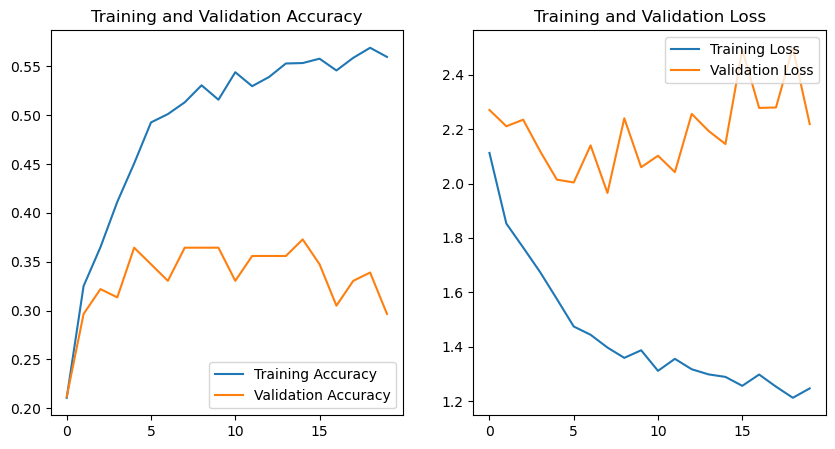

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
`Traning-accuracy = 55` and 

`validation-accuracy = 30` 

This is underfit model and the acurracy of traning and validation dataset is not good

In [27]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# data augmentation


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

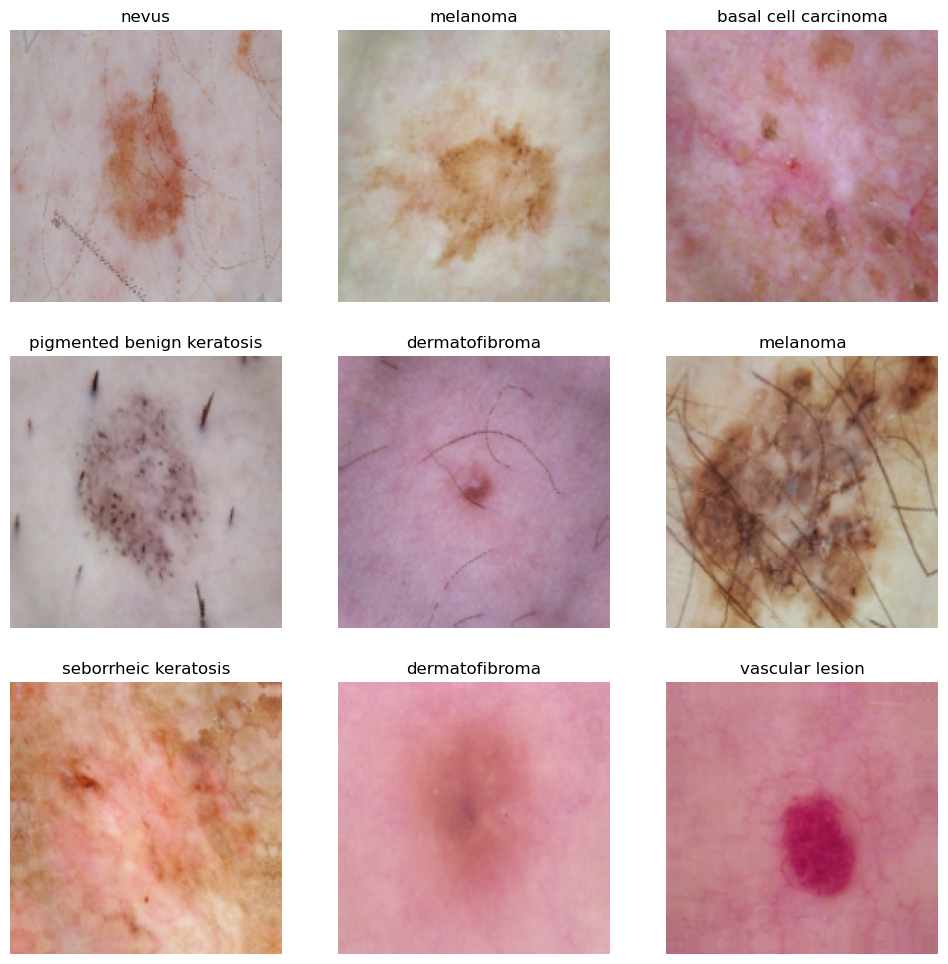

In [28]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [29]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()

model.add(data_augmentation)

model.add(resize_and_rescale)

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(n_classes))

### Compiling the model

In [30]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [31]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 11s 152ms/step - loss: 1.8387 - accuracy: 0.3408 - val_loss: 2.1820 - val_accuracy: 0.2119
Epoch 2/20
70/70 [==============================] - 11s 156ms/step - loss: 1.5820 - accuracy: 0.4386 - val_loss: 2.3161 - val_accuracy: 0.3390
Epoch 3/20
70/70 [==============================] - 11s 155ms/step - loss: 1.4528 - accuracy: 0.4837 - val_loss: 2.0247 - val_accuracy: 0.3983
Epoch 4/20
70/70 [==============================] - 11s 152ms/step - loss: 1.3385 - accuracy: 0.5266 - val_loss: 2.3607 - val_accuracy: 0.3559
Epoch 5/20
70/70 [==============================] - 11s 157ms/step - loss: 1.2851 - accuracy: 0.5462 - val_loss: 2.1754 - val_accuracy: 0.3644
Epoch 6/20
70/70 [==============================] - 11s 156ms/step - loss: 1.2862 - accuracy: 0.5382 - val_loss: 2.2740 - val_accuracy: 0.3559
Epoch 7/20
70/70 [==============================] - 11s 152ms/step - loss: 1.2844 - accuracy: 0.5382 - val_loss: 2.1641 - val_accuracy: 0.3644

### Visualizing the results

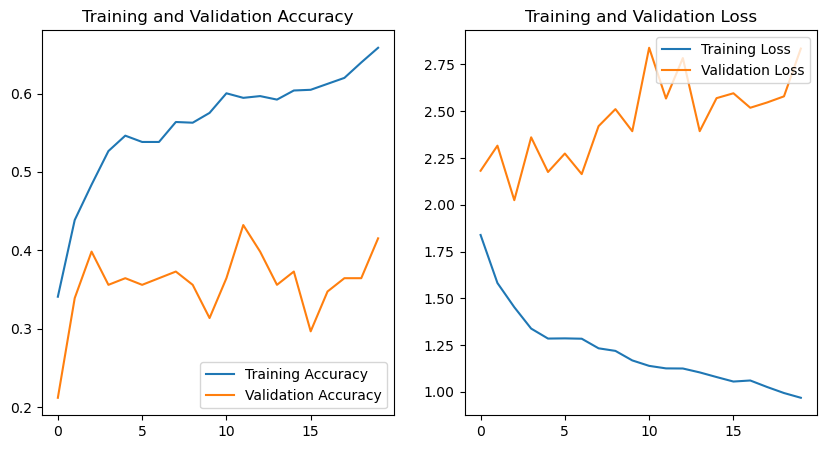

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

This model is underfiting beacuse of which it has low training & validation accuracy

`Traning accuracy = 63 ` and 

`Validation accuracy = 41 `

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [33]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [34]:
data_dir_train = pathlib.Path(r"C:\\Users\Shiva Shankar\\ML-2\\melanoma\\Train")


In [35]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [36]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))


In [37]:
count

[114, 376, 95, 438, 357, 462, 77, 181, 139]

<BarContainer object of 9 artists>

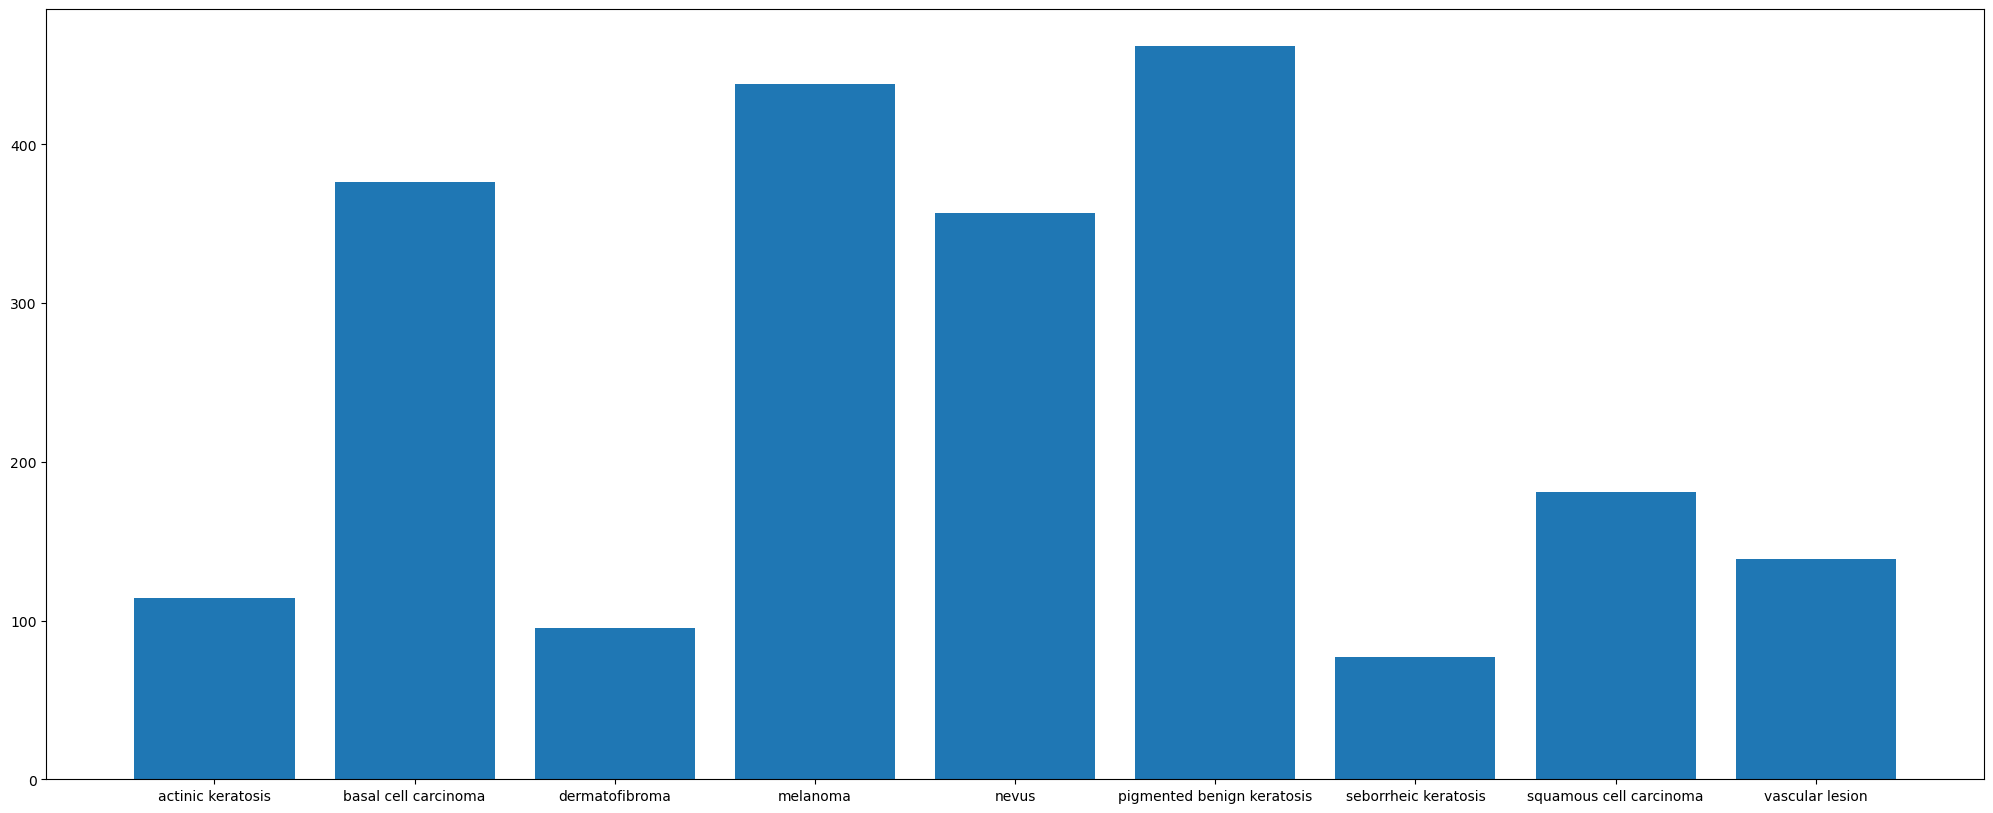

In [38]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)


#### **Todo:** Write your findings here: 

#### - Which class has the least number of samples?
#### - Ans: dermatofibroma & seborrheic keratosi has the least number of samples

#### - Which classes dominate the data in terms proportionate number of samples?
#### - Ans: pigmented benign keratosis & melanoma dominate the data in terms proportionate number of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [39]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [40]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\Shiva Shankar\ML-2\melanoma\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D79C255990>: 100%|██████████| 500/500 [00:01<00:00, 302.39 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Users\Shiva Shankar\ML-2\melanoma\Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D7C31D9110>: 100%|██████████| 500/500 [00:01<00:00, 326.84 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:\Users\Shiva Shankar\ML-2\melanoma\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D7C1821110>: 100%|██████████| 500/500 [00:01<00:00, 269.50 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\Shiva Shankar\ML-2\melanoma\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1D7C19BDA50>: 100%|██████████| 500/500 [00:08<00:00, 60.03 Samples/s]  


Initialised with 357 image(s) found.
Output directory set to C:\Users\Shiva Shankar\ML-2\melanoma\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1D79C29A850>: 100%|██████████| 500/500 [00:08<00:00, 56.46 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:\Users\Shiva Shankar\ML-2\melanoma\Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D79C235510>: 100%|██████████| 500/500 [00:10<00:00, 46.93 Samples/s] 


Initialised with 77 image(s) found.
Output directory set to C:\Users\Shiva Shankar\ML-2\melanoma\Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1D7C1746350>: 100%|██████████| 500/500 [00:03<00:00, 130.24 Samples/s]


Initialised with 181 image(s) found.
Output directory set to C:\Users\Shiva Shankar\ML-2\melanoma\Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D7C161F4D0>: 100%|██████████| 500/500 [00:01<00:00, 323.84 Samples/s]


Initialised with 139 image(s) found.
Output directory set to C:\Users\Shiva Shankar\ML-2\melanoma\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D7C18EF8D0>: 100%|██████████| 500/500 [00:01<00:00, 298.69 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [41]:
#Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. 
#Lets take a look at total count of augmented images.

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


#### Lets see the distribution of augmented data after adding new images to the original training data.


<BarContainer object of 9 artists>

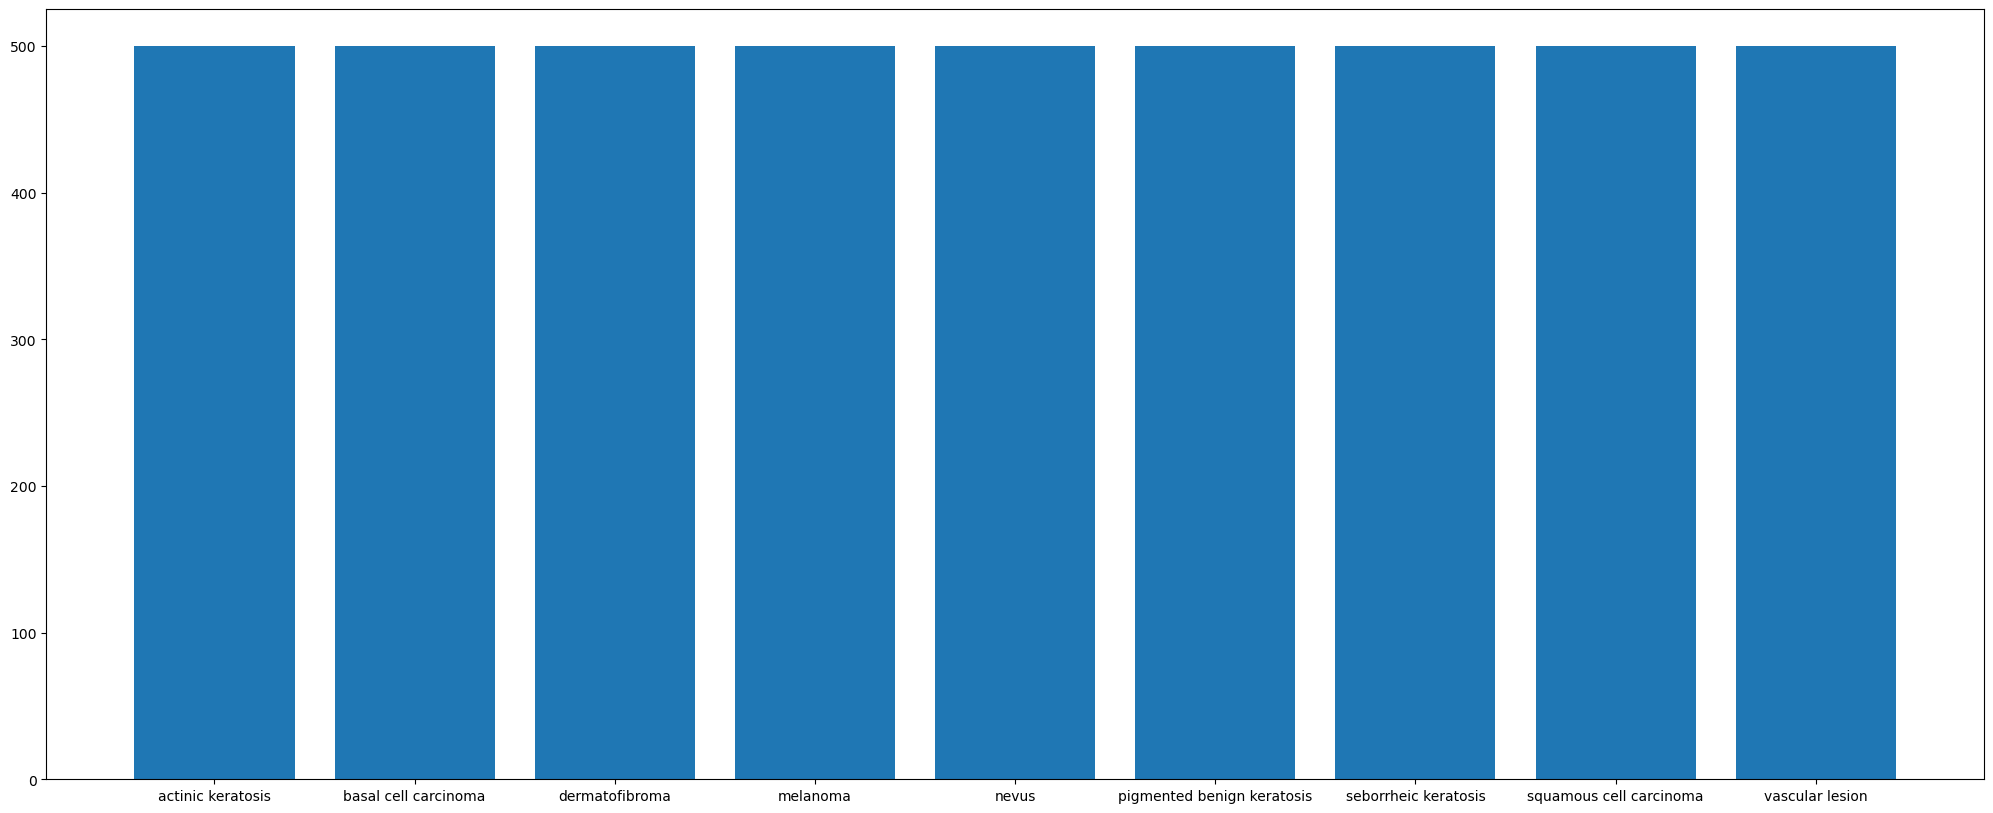

In [42]:
# Check the distribution of data again. 
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
import os
from glob import glob

In [44]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\Shiva Shankar\\ML-2\\melanoma\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_25bc7d0a-d77b-4121-a8ca-faad467178e9.jpg',
 'C:\\Users\\Shiva Shankar\\ML-2\\melanoma\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3bcd2585-58e6-48c7-8f4f-4066c43dda87.jpg',
 'C:\\Users\\Shiva Shankar\\ML-2\\melanoma\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_48db72b9-75f7-479b-8bc2-fc9250d2681b.jpg',
 'C:\\Users\\Shiva Shankar\\ML-2\\melanoma\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_97da7186-19f4-45bb-8c03-dd85d3dc7362.jpg',
 'C:\\Users\\Shiva Shankar\\ML-2\\melanoma\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b82dcc03-cf1a-4be0-9359-6fa107ac5876.jpg',
 'C:\\Users\\Shiva Shankar\\ML-2\\melanoma\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_ef5509d2-b04e-4816-a531-c02be37c274c.jpg',
 'C:\\User

In [45]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [46]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [47]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [48]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\Shiva Shankar\AppData\Local\Temp\ipykernel_15216\390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [49]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [50]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [51]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [52]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [53]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [54]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [55]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
169/169 [==============================] - 30s 148ms/step - loss: 1.9285 - accuracy: 0.2728 - val_loss: 1.6242 - val_accuracy: 0.3771
Epoch 2/20
169/169 [==============================] - 25s 146ms/step - loss: 1.4456 - accuracy: 0.4627 - val_loss: 1.2951 - val_accuracy: 0.5316
Epoch 3/20
169/169 [==============================] - 25s 145ms/step - loss: 1.2102 - accuracy: 0.5529 - val_loss: 1.3137 - val_accuracy: 0.5174
Epoch 4/20
169/169 [==============================] - 24s 141ms/step - loss: 1.0358 - accuracy: 0.6200 - val_loss: 1.0776 - val_accuracy: 0.6073
Epoch 5/20
169/169 [==============================] - 24s 141ms/step - loss: 0.8899 - accuracy: 0.6801 - val_loss: 0.9552 - val_accuracy: 0.6533
Epoch 6/20
169/169 [==============================] - 24s 141ms/step - loss: 0.7358 - accuracy: 0.7342 - val_loss: 0.9605 - val_accuracy: 0.6748
Epoch 7/20
169/169 [==============================] - 24s 141ms/step - loss: 0.6299 - accuracy: 0.7791 - val_loss: 0.8550 - val_ac

#### **Todo:**  Visualize the model results

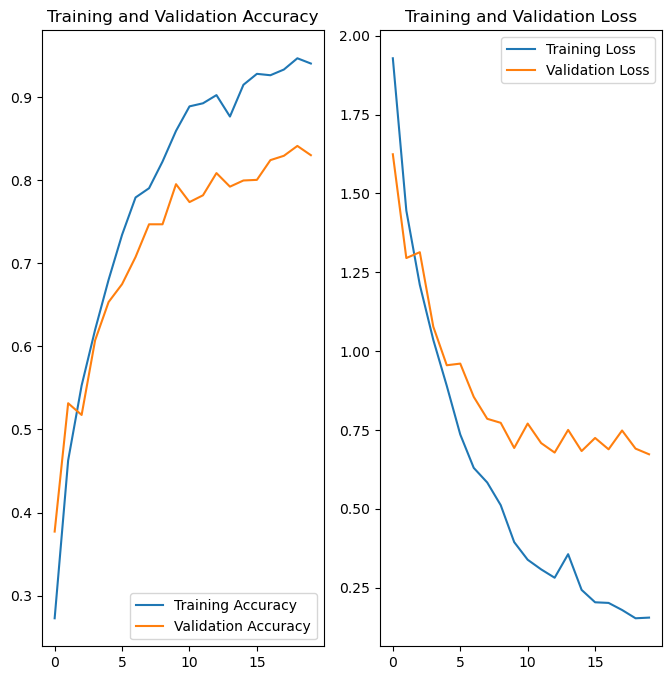

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
`Traning Accuracy = 92`

`Validation Accuracy = 81 `

This is good. Both training and validation loss is reduced. We have got rid of underfitting/overfitting issue. class rebalance helped in improving the performance